## Set local path and import packages


In [4]:
#Set Local path
local_path='C:/Users/ohm/Downloads/Data_Science_exercises/Project_Datasets/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/'

In [5]:
#Import pacakges
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [6]:
df_flight=pd.read_csv(local_path+'flight_data.csv',sep=',',na_values='NA')
df_flight.tail()
df_flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Remove Null Values from relevant field

In [7]:
#Null value removal from dep_delay, arr_delay,air_time

#dep_delay fill null by mean dep_time of the origin airport and month factor combination
df_flight['dep_delay']=df_flight.dep_delay.fillna(df_flight.groupby(['origin','month'])['dep_delay'].transform('mean'))
df_flight[df_flight.month==8].tail()

#arr_delay fill null by mean of arr_time of destination airport and month factor combination
df_flight['arr_delay']=df_flight.arr_delay.fillna(df_flight.groupby(['dest','month'])['arr_delay'].transform('mean'))
df_flight[df_flight.month==9].tail()

#air_time fill null by mean of air_time of destination airport and origin airport
df_flight['air_time']=df_flight.air_time.fillna(df_flight.groupby(['origin','dest'])['air_time'].transform('mean'))
df_flight.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,6.635776,NaN,1634,-0.793522,9E,3393,NaN,JFK,DCA,47.893368,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,6.207439,NaN,2312,3.709302,9E,3525,NaN,LGA,SYR,38.063197,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,6.207439,NaN,1330,-6.317604,MQ,3461,N535MQ,LGA,BNA,113.698317,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,6.207439,NaN,1344,0.300578,MQ,3572,N511MQ,LGA,CLE,69.386386,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,6.207439,NaN,1020,-0.883987,MQ,3531,N839MQ,LGA,RDU,70.557864,431,8,40,30-09-2013 08:00


### See Existing Null Values count

In [8]:
sum(pd.isnull(df_flight['dep_delay']))
#sum(pd.isnull(df_flight['dep_time']))

0

In [9]:
nanvalues=len(df_flight)-df_flight.count()
nanvalues

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay            0
arr_time          8713
sched_arr_time       0
arr_delay            1
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             1
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

### Find out single Null Value that did not filled by earler stage

In [10]:
#Query NaN Value
df_flight[df_flight.arr_delay!=df_flight.arr_delay]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
275945,2013,7,27,NaN,106,22.035112,NaN,245,NaN,US,1632,NaN,EWR,LGA,NaN,17,1,6,27-07-2013 01:00


### Fill the specific null value

In [11]:
#fill this Nan value for airtime and arr delay of 17 Km flight
df_flight.arr_delay.fillna(0,inplace=True)
df_flight[df_flight.air_time!=df_flight.air_time]
df_flight.air_time.fillna(66,inplace=True)
#df_flight[df_flight.air_time!=df_flight.air_time]

### Basic Stats of the database

In [12]:
df_flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,336776.000000,328063.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.679235,1502.054999,1536.380220,7.008844,1971.923620,149.638388,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,39.723799,533.264132,497.457142,44.040063,1632.471938,93.340835,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-16.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-1.000000,1535.000000,1556.000000,-4.000000,1496.000000,128.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,12.000000,1940.000000,1945.000000,14.000000,3465.000000,190.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Display 500 to 510 rows

In [13]:
pd.set_option('display.max_rows',500)
df_flight[500:510]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
500,2013,1,1,1550.0,1550,0.0,1844.0,1831,13.0,9E,3372,N934XJ,JFK,IND,139.0,665,15,50,01-01-2013 15:00
501,2013,1,1,1552.0,1600,-8.0,1732.0,1720,12.0,EV,5709,N825AS,LGA,IAD,55.0,229,16,0,01-01-2013 16:00
502,2013,1,1,1552.0,1600,-8.0,1826.0,1820,6.0,FL,620,N997AT,LGA,ATL,132.0,762,16,0,01-01-2013 16:00
503,2013,1,1,1552.0,1600,-8.0,1749.0,1757,-8.0,9E,3459,N910XJ,JFK,BNA,150.0,765,16,0,01-01-2013 16:00
504,2013,1,1,1552.0,1600,-8.0,1933.0,1915,18.0,AA,565,N3CGAA,JFK,DFW,254.0,1391,16,0,01-01-2013 16:00
505,2013,1,1,1554.0,1600,-6.0,1701.0,1734,-33.0,9E,3331,N931XJ,JFK,BOS,41.0,187,16,0,01-01-2013 16:00
506,2013,1,1,1554.0,1559,-5.0,1857.0,1841,16.0,DL,847,N918DE,LGA,ATL,131.0,762,15,59,01-01-2013 15:00
507,2013,1,1,1554.0,1600,-6.0,1830.0,1820,10.0,MQ,3985,N606MQ,JFK,CVG,118.0,589,16,0,01-01-2013 16:00
508,2013,1,1,1556.0,1600,-4.0,1737.0,1739,-2.0,EV,5163,N761ND,LGA,PIT,69.0,335,16,0,01-01-2013 16:00
509,2013,1,1,1557.0,1600,-3.0,1910.0,1939,-29.0,DL,1508,N955DL,JFK,RSW,171.0,1074,16,0,01-01-2013 16:00


### Datatypes and information of flight data frame

In [14]:
df_flight.dtypes
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


### How many origin airports? What is their average delay?

In [15]:
df_flight.groupby('origin').agg({'dep_delay':[np.size,np.mean]})

dep_delay           
            size       mean
origin                     
EWR     120835.0  15.153855
JFK     111279.0  12.142388
LGA     104662.0  10.393012

### How is the monthwise departure delay analysis of all 3 airports together
1) Finding June and July has most average delay

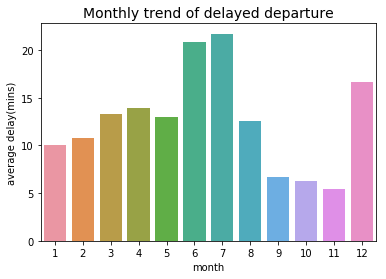

dep_delay           
           size       mean
month                     
1       27004.0  10.044533
2       24951.0  10.820183
3       28834.0  13.240960
4       28330.0  13.939634
5       28796.0  12.988823
6       28243.0  20.843690
7       29425.0  21.703549
8       29327.0  12.607261
9       27574.0   6.721082
10      28889.0   6.246079
11      27268.0   5.435347
12      28135.0  16.601737

In [16]:
df_month=df_flight.groupby(['month']).agg({'dep_delay':[np.size,np.mean]})
sns.barplot(df_month.index,df_month['dep_delay','mean'])
plt.ylabel('average delay(mins)')
plt.title('Monthly trend of delayed departure',fontsize=14)
plt.show()
df_month

### Monthly comparison of 3 airports interms of delay
1) Which airport in which month has maximum delay

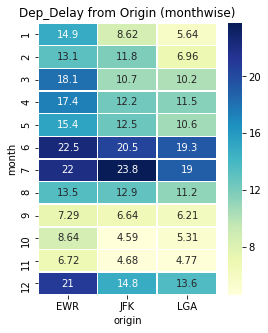

origin,EWR,JFK,LGA
month,,,
1,14.905748,8.615826,5.641560
2,13.067263,11.791355,6.961582
3,18.102457,10.721825,10.232041
4,17.400058,12.249059,11.508915
5,15.366141,12.519432,10.630508
6,22.470810,20.499729,19.296698
7,22.035112,23.769262,18.995163
8,13.493714,12.914358,11.244042
9,7.290954,6.635776,6.207439


In [17]:
df_flight_piv=df_flight.pivot_table(values='dep_delay', index=['month'],columns='origin')
plt.figure(figsize=(4,5))
sns.heatmap(df_flight_piv,cmap='YlGnBu',annot=True,linewidths=.5,linecolor='W',fmt='.3g')
plt.title('Dep_Delay from Origin (monthwise)')
plt.show()
df_flight_piv

### Is their any specific patten of three airports over the months? trend found

Text(0,0.5,'dep_delay(mins)')

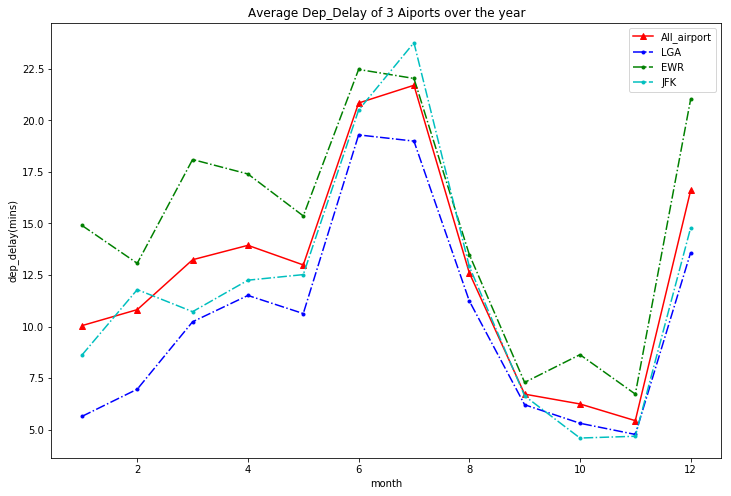

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df_month.index,df_month['dep_delay','mean'],'r-^',df_month.index,df_flight_piv.LGA,'b-..',
            df_flight_piv.index,df_flight_piv.EWR,'g-..',df_flight_piv.index,df_flight_piv.JFK,'c-..')
plt.title('Average Dep_Delay of 3 Aiports over the year')
plt.legend(('All_airport','LGA','EWR','JFK'))
plt.xlabel('month')
plt.ylabel('dep_delay(mins)')

### Is there any trend of dep_delay within days of months? trend found

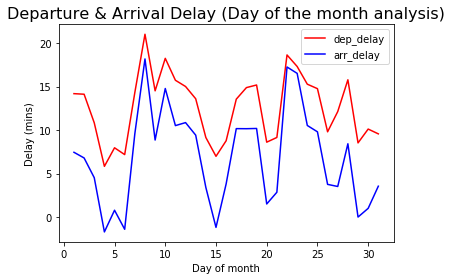

In [19]:
dep_delay=df_flight.groupby('day').agg({'dep_delay':np.mean})
arr_delay=df_flight.groupby('day').agg({'arr_delay':np.mean})
plt.plot(dep_delay.index,dep_delay,'r',arr_delay.index,arr_delay,'b',antialiased=True)
plt.title('Departure & Arrival Delay (Day of the month analysis)',fontsize=16)
plt.xlabel('Day of month')
plt.ylabel('Delay (mins)')
plt.legend(('dep_delay','arr_delay'))

### Which day of the year had highest delay? Maximum delay was on March 8,2013

In [20]:
df_flight_day=df_flight.pivot_table(values='dep_delay',index=['day'],columns='month')
df_flight_day.max()

month
1     27.038572
2     36.869460
3     70.774464
4     42.782019
5     42.676411
6     45.377542
7     53.179105
8     41.554569
9     48.884007
10    36.941919
11    21.500762
12    46.421417
dtype: float64

Text(0.5,1,'Dep_delay analysis (all origin) daywise monthwise')

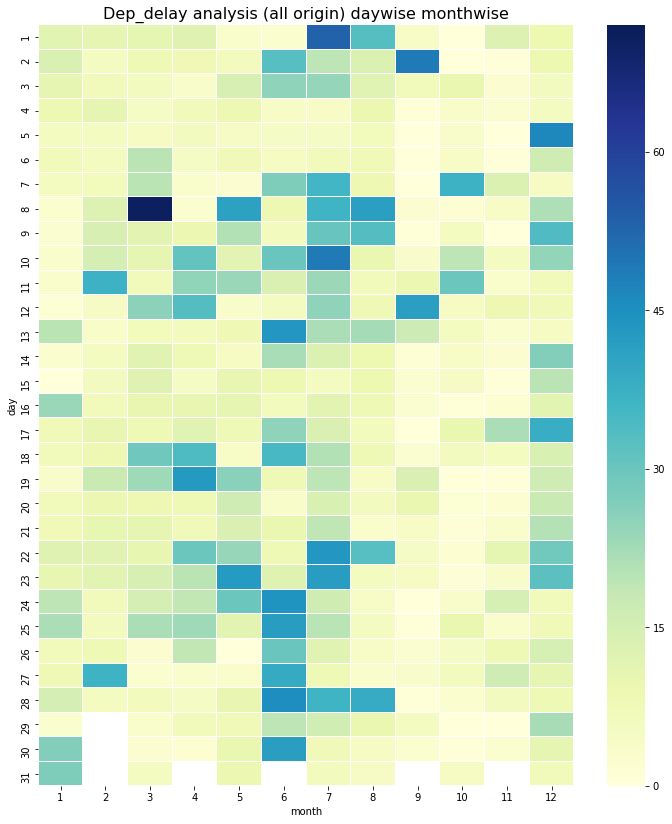

In [21]:
plt.figure(figsize=(12,14))
sns.heatmap(df_flight_day,vmin=0,vmax=72,cmap='YlGnBu',linecolor='white',linewidths=0.01)
plt.title('Dep_delay analysis (all origin) daywise monthwise',fontsize=16)

In [22]:
#sns.distplot(df_flight.dep_delay,bins=20,kde=True)

In [23]:
#df_flight.head()

### Finding percentage delay of 3 airport, EWR has 46% delay, it has highest average delay as well

In [24]:
sum(df_flight['dep_delay']>0)
#sns.pairplot(df_flight_sub)

136687

In [25]:
df_flight['dep_delay_count']=(df_flight['dep_delay']>0)
df_flight.head(2)
df_flight_dep_delay=df_flight.groupby('origin').agg({'dep_delay_count':(np.size,np.sum),'dep_delay':np.mean} )
df_flight_dep_delay['Percentage of Delay']=100*df_flight_dep_delay['dep_delay_count','sum']/df_flight_dep_delay['dep_delay_count','size']
df_flight_dep_delay

dep_delay_count           dep_delay Percentage of Delay
                  size      sum       mean                    
origin                                                        
EWR             120835  55950.0  15.153855           46.302810
JFK             111279  43894.0  12.142388           39.444999
LGA             104662  36843.0  10.393012           35.201888

### Total delay verses ontime

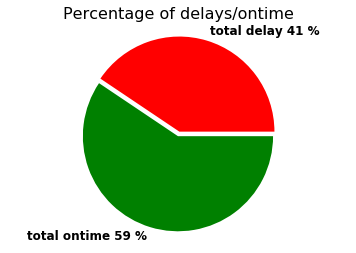

In [26]:
total_delay=sum(df_flight['dep_delay']>0)
total_non_delay=df_flight.dep_delay.size-total_delay
total_non_delay
lab=['total delay '+str(round(100*total_delay/df_flight.dep_delay.size))+' %',
     'total ontime '+str(round(100*total_non_delay/df_flight.dep_delay.size))+' %']
plt.pie([total_delay,total_non_delay],explode=[.05,0],colors=['red','green'],labels=lab,
       textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.axis('equal')
plt.title('Percentage of delays/ontime',fontsize=16)
plt.show()

### Airport wise contribution in delays of 41%, EWR has highest contribution, LGA is best performing in dep_delay

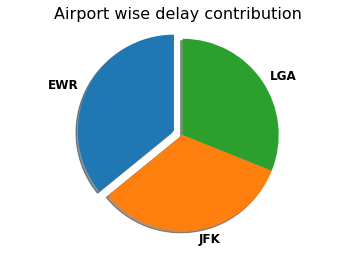

In [27]:
plt.pie(df_flight_dep_delay['dep_delay_count','size'],explode=[.1,0,0],
        labels=df_flight_dep_delay.index, startangle=90,shadow=True,
        textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.title('Airport wise delay contribution',fontsize=16)
plt.axis('equal')
plt.show()

### Finding Arrival delay percentage

In [28]:
df_flight['arr_delay_count']=(df_flight.arr_delay>0)
df_arr=df_flight.groupby('dest').agg({'arr_delay':[np.size,np.mean],'arr_delay_count':np.sum})
df_arr_s=df_arr.sort_values([('arr_delay','size')],ascending=False)
df_arr_s['percent of arr_delay']=100*df_arr_s['arr_delay_count','sum']/df_arr_s['arr_delay','size']
#df_arr_s.reset_index('dest')
df_arr_s

arr_delay            arr_delay_count percent of arr_delay
          size       mean             sum                     
dest                                                          
ORD    17283.0   5.949364          6773.0            39.188798
ATL    17215.0  11.375619          8324.0            48.353180
LAX    16174.0   0.533731          6011.0            37.164585
BOS    15508.0   2.971862          5134.0            33.105494
MCO    14082.0   5.484674          5655.0            40.157648
CLT    14064.0   7.427467          6203.0            44.105518
SFO    13331.0   2.717008          5033.0            37.754107
FLL    12055.0   8.126529          5356.0            44.429697
MIA    11728.0   0.337954          3962.0            33.782401
DCA     9705.0   9.179664          4564.0            47.027306
DTW     9384.0   5.492427          3563.0            37.968883
DFW     8738.0   0.387173          3141.0            35.946441
RDU     8163.0  10.112500          3759.0            46.049247
TPA     7466.0   7.455146          3116.0            41.735869
DEN     7266.0   8.606987          3306.0            45.499587
IAH     7198.0   4.277374          2983.0            41.442067
MSP     7185.0   7.318963          3026.0            42.115518
PBI     6554.0   8.587216          2935.0            44.781813
BNA     6333.0  11.914948          2968.0            46.865625
LAS     5997.0   0.249415          2128.0            35.484409
SJU     5819.0   2.547455          2211.0            37.996219
IAD     5700.0  13.982097          2692.0            47.228070
BUF     4681.0   8.985780          1878.0            40.119633
PHX     4656.0   2.091563          1852.0            39.776632
CLE     4573.0   9.238211          1953.0            42.707194
STL     4339.0  11.198455          2008.0            46.277944
MDW     4113.0  12.313933          1962.0            47.702407
CVG     3941.0  15.604083          1881.0            47.729003
SEA     3923.0  -1.124843          1281.0            32.653581
MSY     3799.0   6.567724          1572.0            41.379310
RSW     3537.0   3.245005          1433.0            40.514560
CMH     3524.0  10.690651          1629.0            46.225880
CHS     2884.0  10.719312          1314.0            45.561720
PIT     2875.0   7.756555          1209.0            42.052174
MKE     2802.0  14.132772          1412.0            50.392577
SAN     2737.0   3.114949          1108.0            40.482280
JAX     2720.0  12.020867          1323.0            48.639706
BTV     2589.0   9.046014          1094.0            42.255697
SLC     2467.0   0.142484           837.0            33.927848
RIC     2454.0  20.298752          1304.0            53.137734
AUS     2439.0   6.094713          1008.0            41.328413
ROC     2416.0  11.616978           999.0            41.349338
PWM     2352.0  11.752662          1051.0            44.685374
HOU     2115.0   7.183981           928.0            43.877069
IND     2077.0  10.043214           920.0            44.294656
MCI     2008.0  14.687830          1031.0            51.344622
MEM     1789.0  10.773982           848.0            47.400783
BWI     1781.0  10.886142           752.0            42.223470
SYR     1761.0   8.962426           725.0            41.169790
PHL     1632.0  10.439424           760.0            46.568627
GSO     1606.0  14.203608           775.0            48.256538
ORF     1536.0  11.131103           703.0            45.768229
DAY     1525.0  12.796032           737.0            48.327869
PDX     1354.0   5.133046           561.0            41.432792
SRQ     1211.0   3.091705           478.0            39.471511
SDF     1157.0  12.763850           549.0            47.450303
XNA     1036.0   7.487663           491.0            47.393822
MHT     1009.0  14.917353           490.0            48.562934
BQN      896.0   8.255156           423.0            47.209821
CAK      864.0  19.898351           474.0            54.861111
OMA      849.0  14.852692           

### Maximum flights went to which destination? 

Text(0.5,1,'Arrival Delay Count')

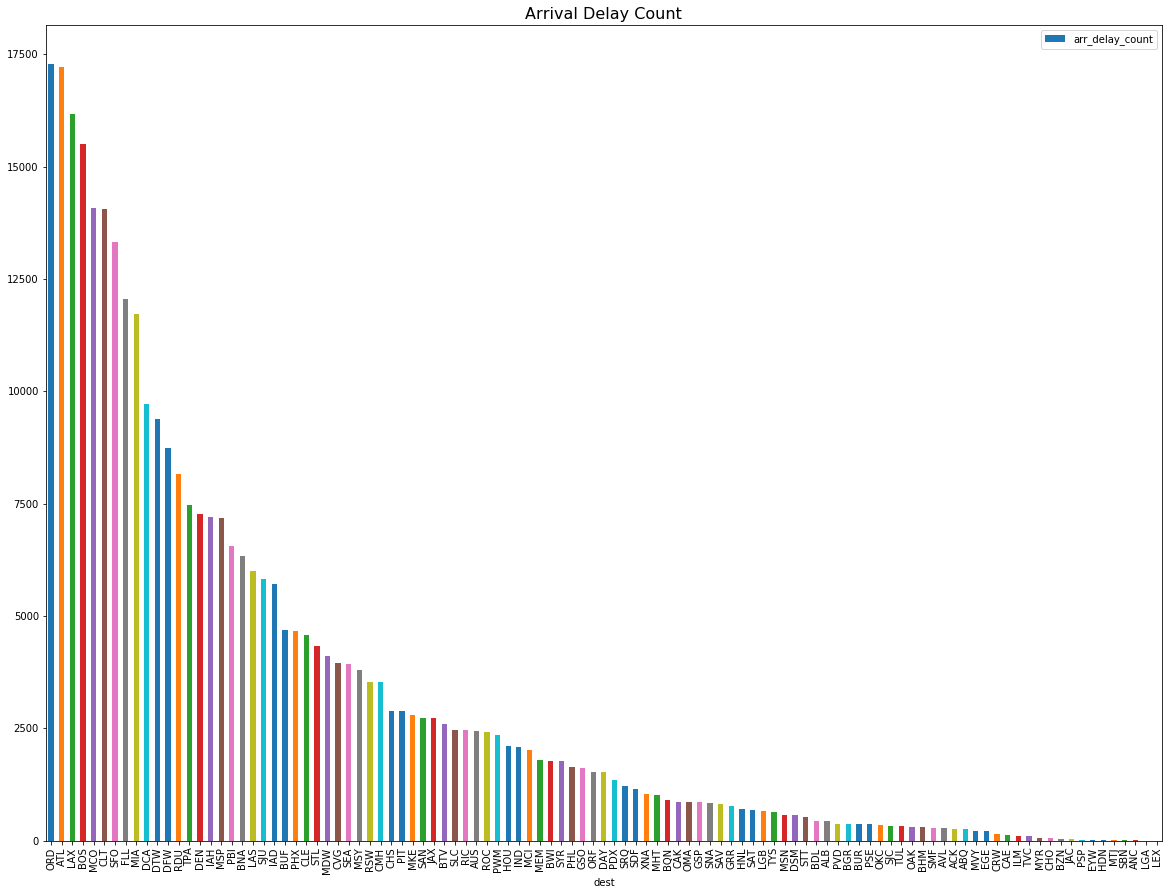

In [29]:
df_arr_s['arr_delay','size'].plot(kind='bar',figsize=(20,15))
plt.legend(['arr_delay_count'])
plt.title('Arrival Delay Count',fontsize=16)


### Most % delays occuring which airport? How they are stacked up?

Text(0.5,0,'Pencentage')

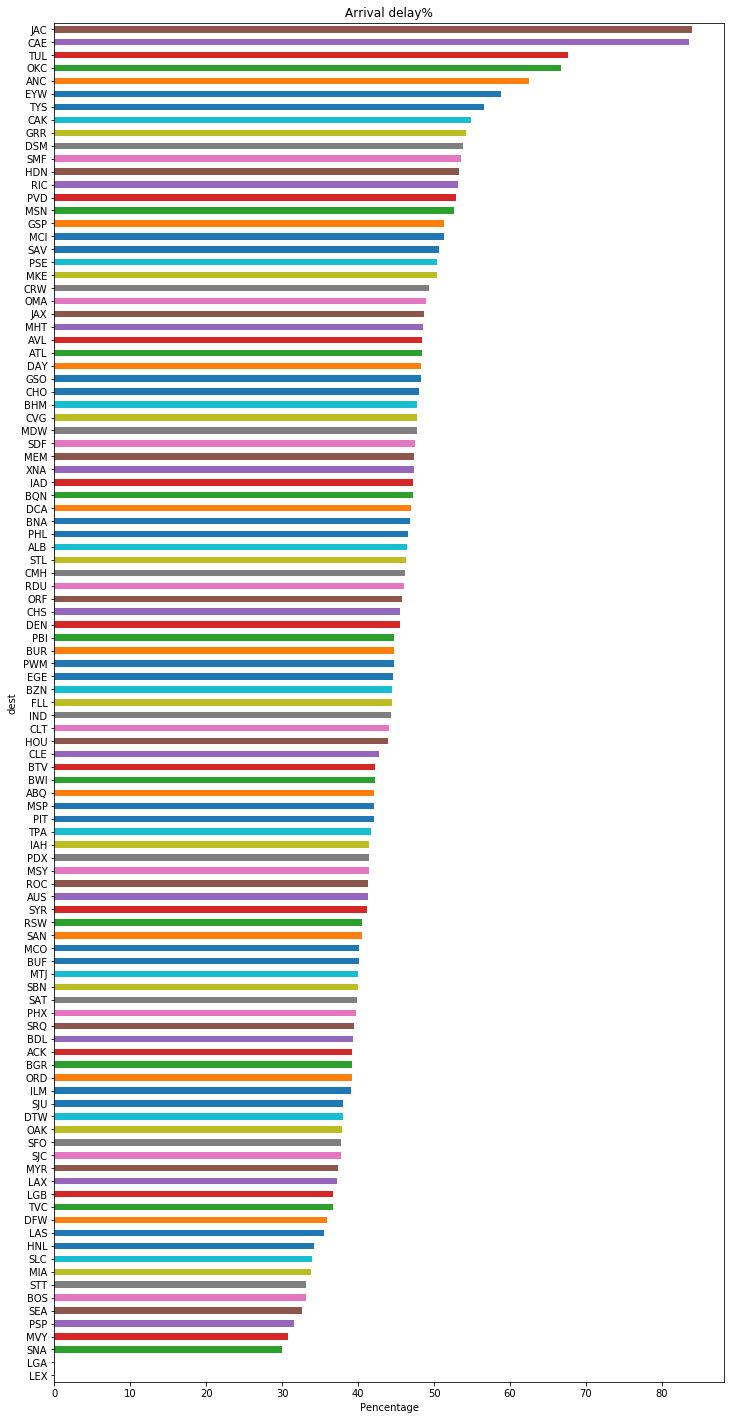

In [30]:
df_arr_s.sort_values('percent of arr_delay',ascending=True)['percent of arr_delay'].plot(kind='barh',figsize=(12,25))
plt.title('Arrival delay%')
plt.xlabel('Pencentage')

### Delay in route analysis

In [31]:
pd.set_option('display.max_columns',50)
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_count,arr_delay_count
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,True,True
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,True,True
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,True,True
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,False,False
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,False,False


In [32]:
df_flight.dep_delay_count!=df_flight.arr_delay_count
print("Done")

Done


### Aircraft Carrier wise speed analysis-Highest speed(avg) to lowest average

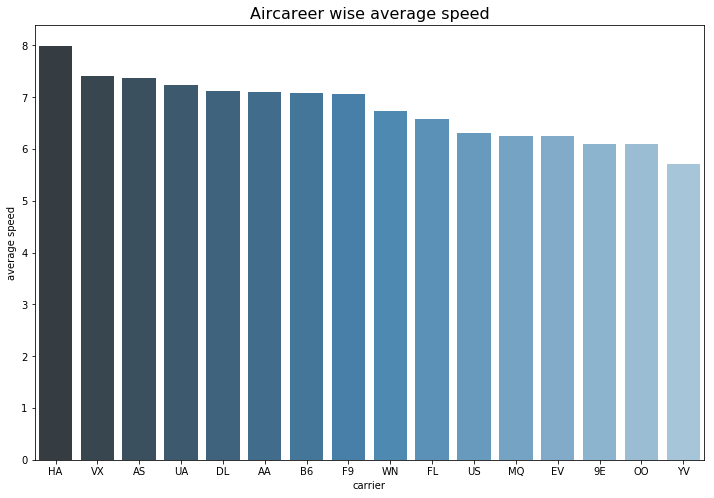

,air_time,distance,avg_speed
carrier,,,
HA,2.130960e+05,1704186,7.997269
VX,1.739497e+06,12902327,7.417275
AS,2.324924e+05,1715028,7.376706
UA,1.240974e+07,89705524,7.228638
DL,8.349918e+06,59507317,7.126694
AA,6.168957e+06,43864584,7.110534
B6,8.252212e+06,58384137,7.074968
F9,1.572671e+05,1109700,7.056150
WN,1.813401e+06,12229203,6.743796


In [33]:
df_flight_carrier_piv=df_flight.pivot_table(values=['air_time','distance'],index='carrier',aggfunc='sum')
df_flight_carrier_piv['avg_speed']=df_flight_carrier_piv['distance']/df_flight_carrier_piv['air_time']
df_flight_carrier_piv.sort_values('avg_speed',ascending=False,inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=df_flight_carrier_piv.index,y=df_flight_carrier_piv['avg_speed'],palette="Blues_d",)
plt.title('Aircareer wise average speed',fontsize=16)
plt.ylabel('average speed')
plt.show()
df_flight_carrier_piv

In [34]:
#Calculate Speed in a new column
df_flight['speed']=df_flight.distance/df_flight.air_time
df_flight.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_delay_count,arr_delay_count,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,True,True,6.167401
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,True,True,6.237885


### How is the variation(Std Dev) of speed?


In [35]:
df_flight[['carrier','speed','distance','air_time']].describe()

,speed,distance,air_time
count,336776.000000,336776.000000,336776.000000
mean,6.559288,1039.912604,149.638388
std,1.009930,733.233033,93.340835
min,0.257576,17.000000,20.000000
25%,5.954082,502.000000,82.000000
50%,6.720000,872.000000,128.000000
75%,7.300912,1389.000000,190.000000
max,11.723077,4983.000000,695.000000


Text(0.5,1,'Analysis of variation in speed of Carriers')

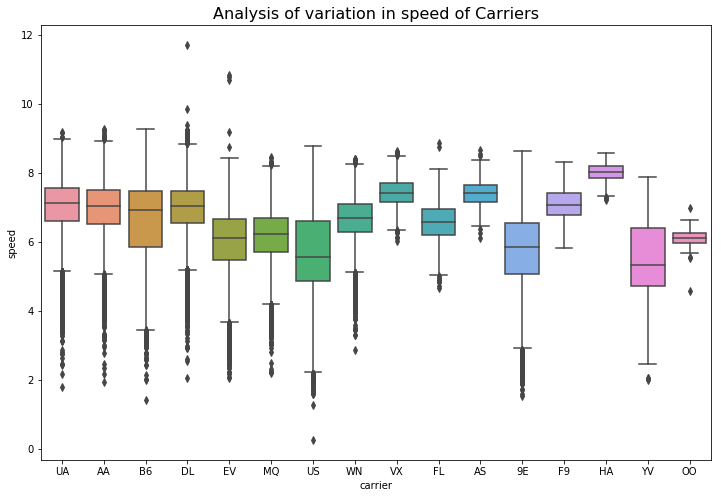

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(df_flight.carrier,df_flight.speed)
plt.title('Analysis of variation in speed of Carriers',fontsize=16)

### Is there any monthly trend of speed for carriers?

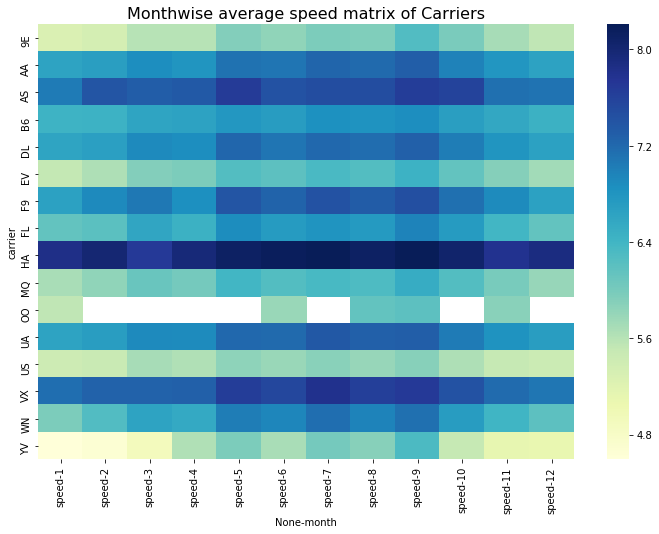

speed                                                              \
month          1         2         3         4         5         6         7    
carrier                                                                         
9E       5.273803  5.343646  5.605784  5.604115  5.931302  5.844992  5.977027   
AA       6.637484  6.689431  6.868146  6.809958  7.125098  7.106976  7.242199   
AS       7.041909  7.395602  7.314627  7.351728  7.680300  7.423316  7.478148   
B6       6.442149  6.451558  6.621321  6.649912  6.769719  6.723147  6.847523   
DL       6.616816  6.677950  6.920862  6.871882  7.225748  7.104423  7.207129   
EV       5.514122  5.659567  5.927339  5.972042  6.271519  6.199301  6.342005   
F9       6.662692  6.909540  7.072378  6.856544  7.393404  7.262102  7.425614   
FL       6.149752  6.217736  6.605404  6.466343  6.889228  6.729623  6.812420   
HA       7.854178  8.006479  7.690078  7.954634  8.117524  8.177960  8.204767   
MQ       5.690091  5.850128  6.107076  6.026370  6.389148  6.266780  6.357754   
OO       5.553030       NaN       NaN       NaN       NaN  5.785073       NaN   
UA       6.634789  6.699787  6.911528  6.899026  7.217003  7.198058  7.361768   
US       5.431516  5.481410  5.696715  5.647145  5.855701  5.791451  5.882066   
VX       7.155025  7.266063  7.267285  7.277678  7.648504  7.553066  7.799184   
WN       5.978111  6.276764  6.637497  6.561505  7.027092  6.947202  7.152617   
YV       4.595490  4.669843  4.912640  5.653589  5.968888  5.686911  6.023954   

                                                           
month          8         9         10        11        12  
carrier                                                    
9E       5.948180  6.277851  5.989955  5.704706  5.542992  
AA       7.204727  7.296210  6.982276  6.793059  6.648861  
AS       7.484559  7.644624  7.598353  7.142142  7.108616  
B6       6.825421  6.872332  6.690383  6.573349  6.465371  
DL       7.172633  7.282882  7.030539  6.807872  6.663347  
EV       6.263823  6.444887  6.157386  5.915641  5.731942  
F9       7.320368  7.460121  7.140592  6.899352  6.663442  
FL       6.752524  6.973926  6.729619  6.394447  6.149660  
HA       8.113484  8.207631  8.055444  7.792902  7.904328  
MQ       6.314667  6.520803  6.263409  6.001090  5.794961  
OO       6.148941  6.202627       NaN  5.879833       NaN  
UA       7.276827  7.302983  7.040877  6.827115  6.705643  
US       5.801847  5.896195  5.653832  5.503343  5.446197  
VX       7.631252  7.690890  7.423403  7.181036  7.087555  
WN       6.979800  7.137772  6.724542  6.413574  6.192603  
YV       5.906066  6.319583  5.499659  5.123466  5.095718

In [37]:
df_flight_carrier_piv=df_flight.pivot_table(values=['speed'],index='carrier',columns='month',aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(df_flight_carrier_piv,cmap='YlGnBu')
plt.title('Monthwise average speed matrix of Carriers',fontsize=16)
plt.show()
df_flight_carrier_piv

### Is there any coorelation between Speed and Distance? Hypothesis is longer distance travels have higher average speed. It is proved worng from scatter plot

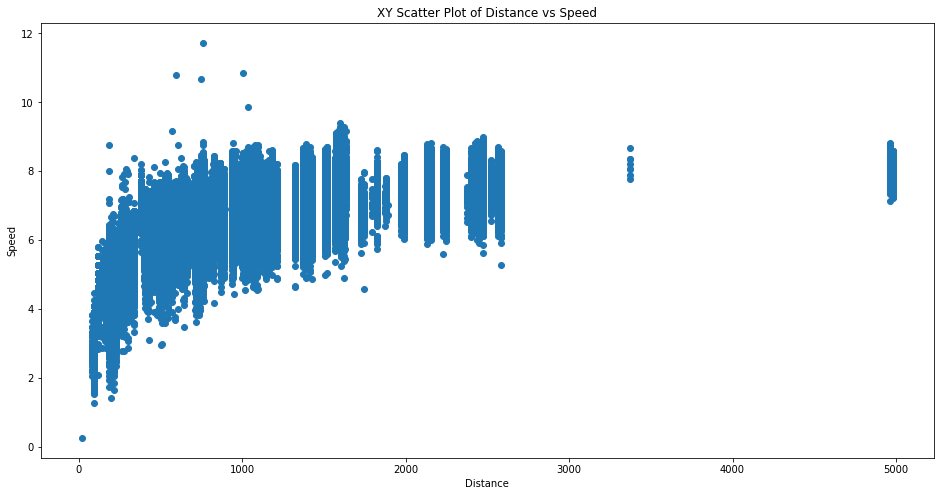

In [38]:
plt.figure(figsize=(16,8))
plt.scatter(df_flight.distance,df_flight.speed)
plt.title('XY Scatter Plot of Distance vs Speed')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

### How is the variation of operating distances for each carriers
1) It is found that fastest HA carrier has a low distance variability and operates at 5000 Km distance

Text(0.5,1,'Variation of operating distances for carriers')

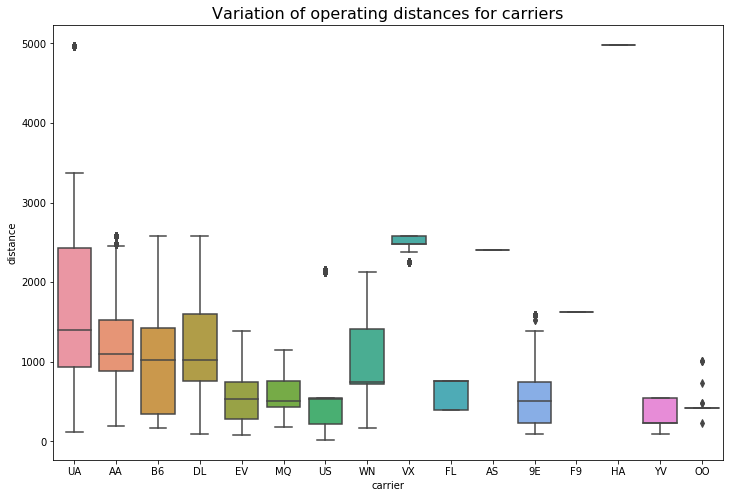

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot('carrier', 'distance',data=df_flight)
plt.title('Variation of operating distances for carriers',fontsize=16)